<a href="https://colab.research.google.com/github/Nickguild1993/machine_learning_models/blob/main/ClassificationModels_WineDS_SCALED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****USING SCALED X_train / X_test for ALL models****



In [24]:
# importing libraries

# numpy and pandas are always going to be imported- they're the basis for pretty much all
# analysis that you can do in python.
import numpy as np
import pandas as pd
import sklearn
# matplotlib & seaborn are for visualizations (seaborn is built on matplotlib, but it's much more versatile)
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn (machine learning library) importing various models and tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# %matplotlib inline keeps your graphs within the parameters of the notebook among other benefits
%matplotlib inline




In [25]:
# import data

from google.colab import files
uploaded = files.upload()

Saving classification_ds_wine.csv to classification_ds_wine (1).csv


In [26]:
# create a DataFrame
import io

df = pd.read_csv(io.BytesIO(uploaded["classification_ds_wine.csv"]))
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis

In [27]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [28]:
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Wine Quality Count')

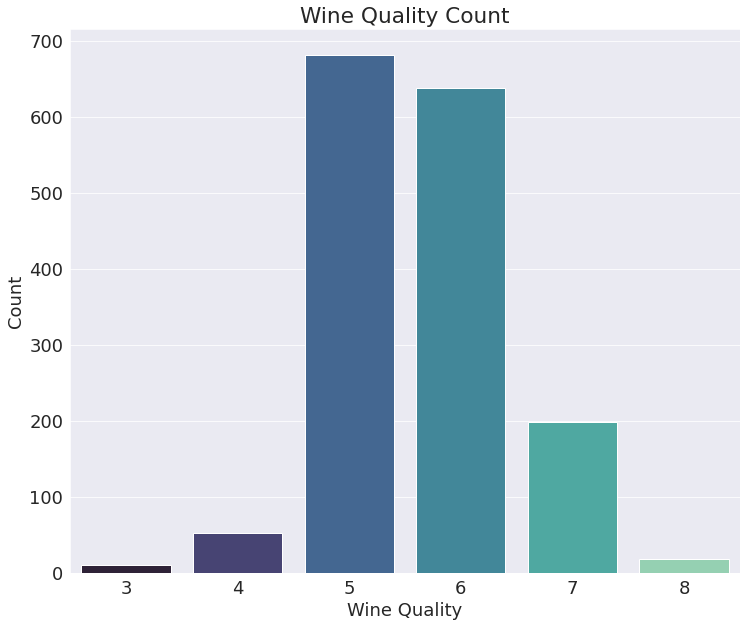

In [29]:
# visualizing value counts of Wine Quality
plt.figure(figsize=(12,10))
plt.rcParams.update({"font.size" : 18})
sns.countplot(x="quality", data=df, palette="mako")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Wine Quality Count")

In [30]:
df.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
# Checking the shape of the DataFrame

print(df.shape)

print("There are 1599 rows and 12 columns")

(1599, 12)
There are 1599 rows and 12 columns


In [32]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


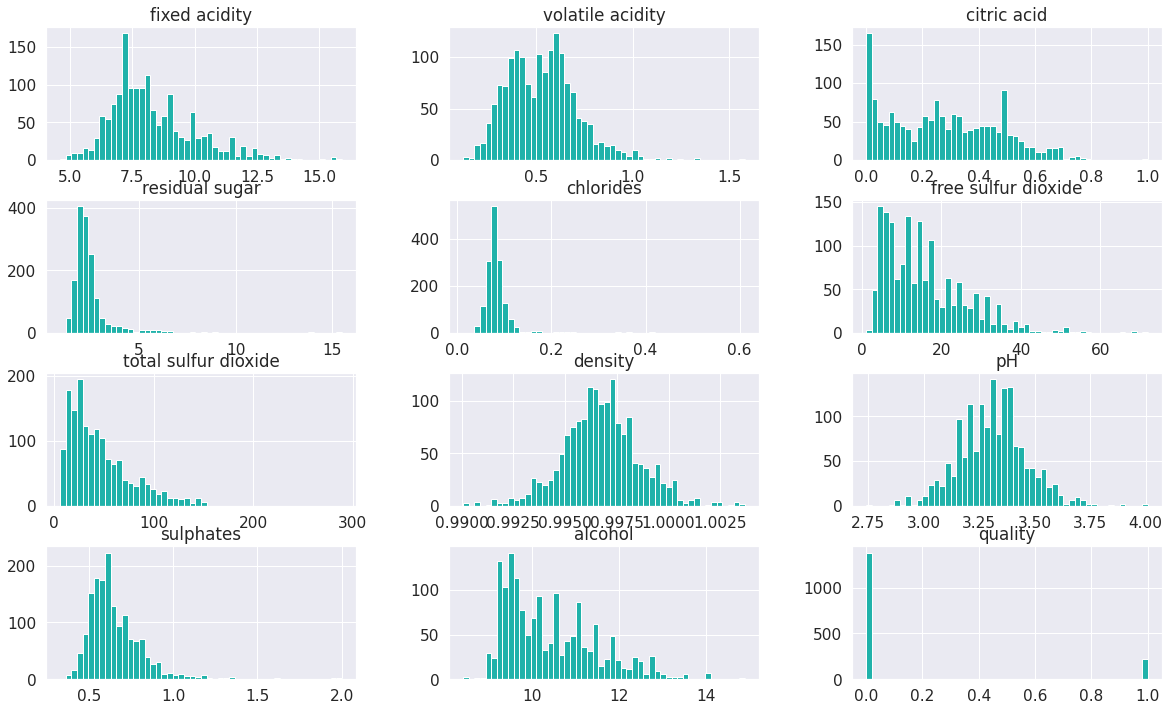

In [55]:
plt.rcParams.update({"font.size":14})
df.hist(bins = 50, color="lightseagreen", figsize = (20,12))
plt.show()

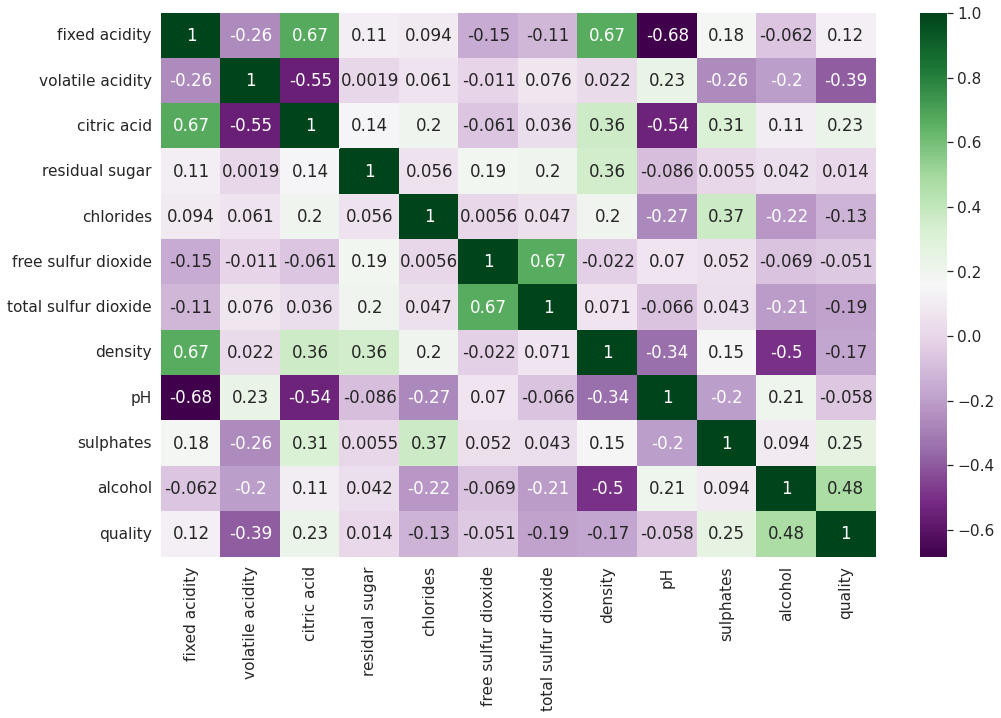

In [34]:
# Correlational heatmap

# .sns(font_scale = X) increase the x/y tick label font sizes to make it more readable 
sns.set(font_scale=1.4)
# setting up the heatmap
plt.figure(figsize=(16,10))
# aliasing .corr function as c
c = df.corr()

# setting .heatmap parameters 
sns.heatmap(c, cmap="PRGn", annot=True)
plt.show()

## Data Preprocessing

In [35]:
# Because quality is currently continuous, we need to change that to a binary classification
# "good" wine & "bad" wine.
# to do that, we'll bin (id est. create subsets that delineate between the classifiers) the target outcome- Quality

bins = (2, 6.5, 8)
# syntax - 2 = lowest value that we have on quality so start bin there, 
# second value (6) is the max value of of first bin, third value is max of second bin (no wine quality > 8)
groups = ["bad", "good"]
# for labels, you could also not use a predefined variable and just do labels = ["good", "bad"] instead of calling *groups*
df["quality"] = pd.cut(df["quality"], bins = bins, labels = groups)


In [36]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


**Encoding categorical features**

In [37]:
df["quality"].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [38]:
# label and encode "quality" target output

# from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
encoded_quality = LabelEncoder()

In [39]:
# encoding the strings "bad","good" into 0/1 so that they're easier to parse as a numeric value
df["quality"] = encoded_quality.fit_transform(df["quality"])

In [40]:
df.quality.value_counts()
# 0 = bad
# 1 = good

0    1382
1     217
Name: quality, dtype: int64

**splitting up data into training/test sets**

- Note: if you don't specify the test_size = 0.xx parameter, it defaults to test_size = 0.25 (meaning that 25% of the data will be used for testing and the remaining 75% will be used for training.

- Not sure how much we wan't to talk about overfitting apropos of train/test ratios? (*Ask Warren*)

In [41]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["quality"], axis=1),
 df["quality"], test_size =0.35, random_state=1)

# X_train = Train Set / X_test = Test set
# Y_train = Train Labels / Y_test = Test Labels

In [97]:
X_train.head(3)

AttributeError: ignored

In [92]:
# reference for the feature (input) columns
df_features = df.drop(columns="quality", index=1)

**Scaling the data**

In [43]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# output is rows by columns

(1039, 11)
(560, 11)
(1039,)
(560,)


#### Put Machine Learning library imports here. (model specific imports should go with those specific models)

In [45]:
# import em here, m'boy
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### LOGISTIC REGRESSION

In [46]:
# import libraries (Need to fix- import these more specific dependencies in cell block instead of up top to keep track)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# alias logistic regression
lr = LogisticRegression()

# fit the model -> use scaled X_train/X_test 
lr.fit(X_train, y_train)
# y_prediction for test set

lr_predict_y = lr.predict(X_test)

In [47]:
# print confusion matrixx and the accuracy score

lr_conf_matrix = confusion_matrix(y_test, lr_predict_y)
lr_acc_score = accuracy_score(y_test, lr_predict_y)

lr_conf_matrix = pd.DataFrame(
    lr_conf_matrix, index=["Actually Good | TP,FN", "Actually Not Good | FP, TN"],
     columns=["Predicted Good", "Predicted Bad" ]
)
lr_conf_matrix
print("Logistic Regression Confusion Matrix")
display(lr_conf_matrix)

print(f' Logistic Regression Score: {lr_acc_score}')
print(classification_report(y_test, lr_predict_y))

Logistic Regression Confusion Matrix


,Predicted Good,Predicted Bad
"Actually Good | TP,FN",459,26
"Actually Not Good | FP, TN",53,22


 Logistic Regression Score: 0.8589285714285714
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       485
           1       0.46      0.29      0.36        75

    accuracy                           0.86       560
   macro avg       0.68      0.62      0.64       560
weighted avg       0.84      0.86      0.85       560



### DECISION TREE MODEL

In [48]:
# Import dependencies - again, need to keep consistent (import here or up top)

from sklearn.tree import DecisionTreeClassifier

# Alias DecisionTreeClassifier
dt = DecisionTreeClassifier()
# Fit the model
dt.fit(X_train, y_train)

# Y_prediction
dt_predict_y = dt.predict(X_test)

In [49]:
# print confusion matrix and accuracy score

dt_conf_matrix = confusion_matrix(y_test, dt_predict_y)

dt_acc_score = accuracy_score(y_test, dt_predict_y)

dt_conf_matrix = pd.DataFrame(
    dt_conf_matrix, index=["Actually Good | TP, FN", "Actually Bad | FP, TN"], columns = ["Predicted Good", "Predicted Bad"]
)

dt_conf_matrix
print("Decision Tree Confusion Matrix")
display(dt_conf_matrix)
print(f'Decsion Tree Accuracy Score:{dt_acc_score}')

print(classification_report(y_test, dt_predict_y))

Decision Tree Confusion Matrix


,Predicted Good,Predicted Bad
"Actually Good | TP, FN",448,37
"Actually Bad | FP, TN",43,32


Decsion Tree Accuracy Score:0.8571428571428571
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       485
           1       0.46      0.43      0.44        75

    accuracy                           0.86       560
   macro avg       0.69      0.68      0.68       560
weighted avg       0.85      0.86      0.85       560



### Random Forest

```
- # Random Forest utilizes multiple decision trees

- # Therefore, doesn't rely on the feature importance stemming from a single decision tree.
```



In [50]:
# import random forest specific libraries

from sklearn.ensemble import RandomForestClassifier
#alais RandomForestClassifier
rf = RandomForestClassifier()

# fit the model
rf.fit(X_train, y_train)
rf_predict_y = rf.predict(X_test)

In [51]:
# Print Confusion Matrix and accuracy score

rf_conf_matrix = confusion_matrix(y_test, rf_predict_y)

rf_acc_score = accuracy_score(y_test, rf_predict_y)


rf_conf_matrix = pd.DataFrame(rf_conf_matrix,
    index=["Actually Good | TP,FN " , "Actually Bad | FP, TN"],
     columns=["Predicted Good", "Predicted Bad"]
)
rf_conf_matrix
display(rf_conf_matrix)
print("Random Forest Confusion Matrix")

print(f'Random Forest Accuracy Score: {rf_acc_score}')

print(classification_report(y_test, rf_predict_y))

,Predicted Good,Predicted Bad
"Actually Good | TP,FN",469,16
"Actually Bad | FP, TN",42,33


Random Forest Confusion Matrix
Random Forest Accuracy Score: 0.8964285714285715
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       485
           1       0.67      0.44      0.53        75

    accuracy                           0.90       560
   macro avg       0.80      0.70      0.74       560
weighted avg       0.89      0.90      0.89       560



In [81]:
rf_importances = rf.feature_importances_
rf_importances

array([0.08038105, 0.12668688, 0.08697756, 0.06186316, 0.07172501,
       0.05911277, 0.07452438, 0.08574428, 0.06202826, 0.12118352,
       0.16977313])

In [94]:
print("Random Forest Ranked Feature Importances")
rf_feature_importances = sorted(zip(rf_importances, feature_names), reverse = True)
rf_feature_importances

Random Forest Ranked Feature Importances


[(0.16977312925051588, 'alcohol'),
 (0.12668687716898386, 'volatile acidity'),
 (0.12118352098638221, 'sulphates'),
 (0.08697756014597292, 'citric acid'),
 (0.08574427882558626, 'density'),
 (0.08038104565886858, 'fixed acidity'),
 (0.07452437845042818, 'total sulfur dioxide'),
 (0.07172501324197796, 'chlorides'),
 (0.06202826326202948, 'pH'),
 (0.061863164270229996, 'residual sugar'),
 (0.0591127687390248, 'free sulfur dioxide')]

In [119]:
rf_feature_df = pd.DataFrame(rf_feature_importances, columns=["Score", "Feature"])
# rf_feature_df = rf_feature_df.set_index("Feature")
rf_feature_df.head(3)

,Score,Feature
0,0.169773,alcohol
1,0.126687,volatile acidity
2,0.121184,sulphates


In [112]:
rf_feature_df["Score"].round(4)

Feature
alcohol                 0.1698
volatile acidity        0.1267
sulphates               0.1212
citric acid             0.0870
density                 0.0857
fixed acidity           0.0804
total sulfur dioxide    0.0745
chlorides               0.0717
pH                      0.0620
residual sugar          0.0619
free sulfur dioxide     0.0591
Name: Score, dtype: float64

Text(0, 0.5, 'Feature')

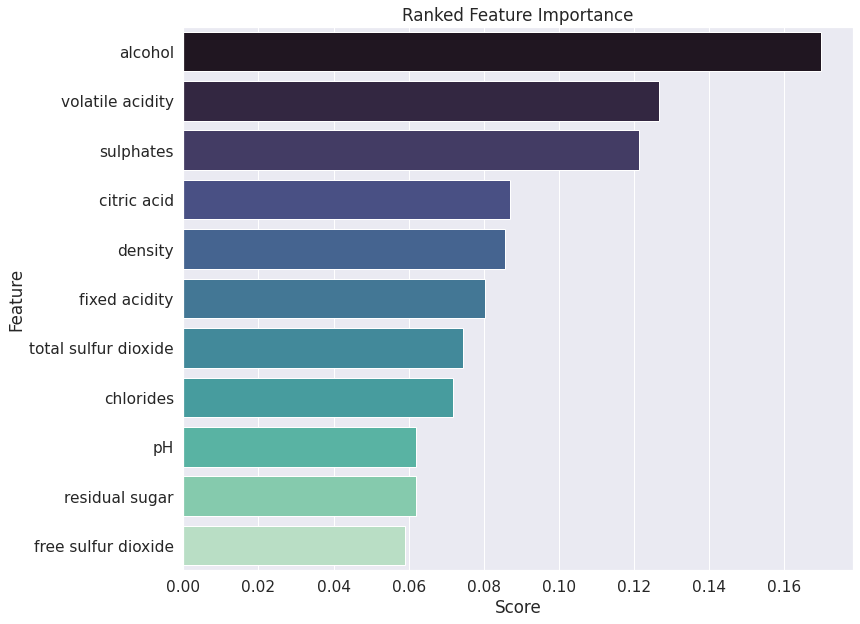

In [124]:
plt.figure(figsize=(12,10))

plt.rcParams.update({"font.size":18})
sns.barplot(x = "Score", y="Feature", data=rf_feature_df, palette="mako")
plt.title("Ranked Feature Importance")
plt.ylabel("Feature")

### SUPPORT VECTOR MACHINE using Support Vector Classifier (SVC)

In [52]:
# Import SVC libraries
from sklearn.svm import SVC

# Support Vector Classifier Model
svc = SVC()
svc.fit(X_train, y_train)

svc_pred_y = svc.predict(X_test)

In [126]:
# SVC confusion matrix, accuracy score, classification report

svc_conf_matrix = confusion_matrix(y_test, svc_pred_y)

svc_acc_score = accuracy_score(y_test, svc_pred_y)

# Make the confusion matrix pretty 
svc_conf_matrix = pd.DataFrame(
    svc_conf_matrix, index=["Actually Good | TP, FN", "Actually Bad | FP, TP"],
                            columns=["Predicted Good", "Predicted Bad"]
)
print("Support Vector Classifier (SVC) Confusion Matrix")
display(svc_conf_matrix)

print(f'SVC Accuracy Score: {svc_acc_score}')

print("SVC Classification Report")
print(classification_report(y_test, svc_pred_y))


Support Vector Classifier (SVC) Confusion Matrix


,Predicted Good,Predicted Bad
"Actually Good | TP, FN",469,16
"Actually Bad | FP, TP",51,24


SVC Accuracy Score: 0.8803571428571428
SVC Classification Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       485
           1       0.60      0.32      0.42        75

    accuracy                           0.88       560
   macro avg       0.75      0.64      0.68       560
weighted avg       0.86      0.88      0.86       560



### Accuracy Score Comparision

In [139]:
# print(svc_acc_score)
# print(rf_acc_score)
# print(dt_acc_score)
# print(lr_acc_score)

In [128]:
score_list = [svc_acc_score, rf_acc_score, dt_acc_score, lr_acc_score]
score_list

[0.8803571428571428,
 0.8964285714285715,
 0.8571428571428571,
 0.8589285714285714]

In [138]:
score_df = pd.DataFrame(score_list, index=["SVC", "Random Forest", "Decision Tree", "Logistic Regression"], columns=["Accuracy Score"])
score_df.sort_values(by="Accuracy Score", ascending=False)

,Accuracy Score
Random Forest,0.896429
SVC,0.880357
Logistic Regression,0.858929
Decision Tree,0.857143


The 4 different classification models all had very similiar accuracy scores.
- Random Forest had the highest accuracy score.
- Going back and changing the ratio of train and test data might very well have an effect on these scores.  But having the split be 75:25 train to test is about as small of a test sample size that I'd be willing to go, in order to avoid overfitting.